<a href="https://colab.research.google.com/github/pvnmahathi/FMML20210264-Labs/blob/main/Lab2_FMML20210264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 11 October 2021 Monday <br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

 ```
 This is a slightly changed version with instructions for Hinton House students
 ```

---
What needs to be done by you in this notebook:
1. Go through the code and understand whatever it wants to show.
2. The evaluation metrics or parts are divided as question sections. You may be
required to either code, write in markdown, refactor to get points in those 
sections. The intention is just that you are able to make most out of the course so don't stress over marks.
---


### Question Section 1 (Refactor)
(You are recommended to bother about this once you are done with other things)

Style guide for reference: https://google.github.io/styleguide/pyguide.html


Refactor the code and ensure the following:
- Functions have good generalized parameter names, named parameters also work.
- Imporant Functions have descriptive and concise docstring so that we are able to keep track of our functions even when the size of the code increases.



1. Made sure that functions have generalized and readable parameter names and added a descriptive docstring to each of the important functions used in the notebook

In [ ]:
rng = np.random.default_rng(seed=0)

In [ ]:
rng.random(size=(5, 2)) * 10 +5

array([[ 6.24283276, 11.70624415],
       [11.47189512, 11.15385111],
       [ 8.83677554, 14.97209936],
       [14.80835339, 11.85541984],
       [11.50459276, 11.88446731]])

In [ ]:
##Importing all the essential libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


In [ ]:
dataset.target[6]

2

Here is a function for calculating the 1-nearest neighbours

In [ ]:
a = np.array([[1, 2, 3, 4, 5]])
?a.sum()

In [ ]:
def NN1(traindata, trainlabel, query):
  """
  Find the nearest point in the dataset,
  Args:
    traindata : Dataset x values
    trainlabel : Class of the dataset values
    query : input to predict about

  Returns:
    label of the datapoint closest to query in the dataset
  """
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel


In [ ]:
?NN1()

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments
  """
  Randomly assigns a class label to input query
  Args:
    traindata : Dataset x values
    trainlabel : Class of the dataset values
    query : input to predict about

  Returns:
    random class label
  """

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [ ]:
def Accuracy(gtlabel, predlabel):
  """
  Calculates the accuracy of the learning algorithm
  Args:
    gtlabel: Groung Truth label for given test data
    predlabel: Label predicted by the learning algorithm used

  Returns:
    Accuracy of the learning algorith used
  """
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  """
  Splits the dataset into training and validation sets
  Args:
    data : Dataset x values on which we should perform the split
    label : Class of the dataset values which should be split
    percent : Percentage of the data to be reserved for training set

  Returns:
    Data will be split into two parts and those parts will be returned
  """
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
print('Number of train samples = ', len(traindata))
print('Number of validation samples = ', len(trainlabel))
print('Percent of validation data = ', len(valdata)*100/len(alltraindata),'%')  #gives the percent of validation data from the train split chosen

Number of train samples =  12368
Number of validation samples =  12368
Percent of validation data =  25.024248302618815 %


What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 50/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.32658042470100074


Plot describing variation of validation accuracy with increase in size of validation set in Nearest Neighbor algorithm Plot-1

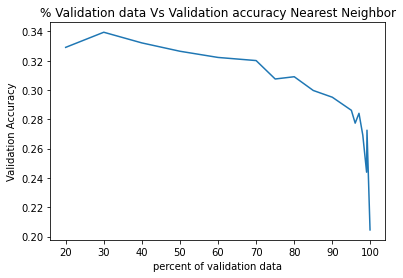

In [ ]:
l_p=[20, 30, 40, 50, 60, 70, 75, 80, 85, 90, 95, 96, 97, 98, 99, 99.1, 99.9]
l = [0.32908318154219796, 0.3394023352463883, 0.33212231304874357, 0.32643193652367963, 0.32220873786407767, 0.3200724887814981, 0.307504873294347, 0.3090494296577947, 0.29966378138636524, 0.29506214309707757, 0.2861418927525156, 0.2773713420787084, 0.2840887777430447, 0.26918557912312163, 0.24391437308868502, 0.2725660469667319, 0.20452752321417733]
plt.title("% Validation data Vs Validation accuracy Nearest Neighbor")
plt.plot(l_p, l)
plt.xlabel('percent of validation data')
plt.ylabel('Validation Accuracy')
plt.show()

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 50/100)
valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using random classifier is  0.16951826234680256


In [ ]:
testpred = RandomClassifier(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.16361003861003862


Plot describing variation of validation accuracy with increase in size of validation set in Random Classifier Plot-2

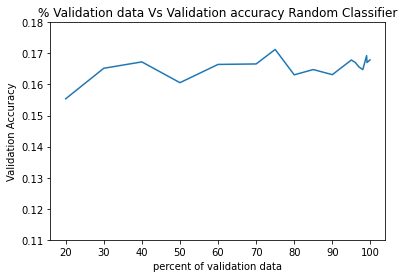

In [ ]:
l_p=[20, 30, 40, 50, 60, 70, 75, 80, 85, 90, 95, 96, 97, 98, 99, 99.1, 99.9]
l = [0.15539, 0.16522, 0.167272, 0.16058,0.16646, 0.16661, 0.17128, 0.16311, 0.16481, 0.16316,0.16788, 0.16711, 0.16564,  0.16479,0.16929,0.16706,0.16792]

plt.plot(l_p, l)
plt.title("% Validation data Vs Validation accuracy Random Classifier")
plt.xlabel('percent of validation data')
plt.ylabel('Validation Accuracy')
#plt.ylim(0.16, 0.17)
plt.yticks([0.11, 0.12, 0.13,0.14, 0.15, 0.16, 0.17, 0.18])
plt.show()

You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Question Set 2: Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1. If we increase the percentage of validation set, the validation accuracy decreases in case of Nearest Neighbor algorithm. It can be depicted in the Plot-1 shown in the above part.

    For Randomclassifier the validation accuracy more or less remains same as (1/number of classes) which is equal to 0.1667 in this case. It is depicted in te Plot-2 shown in the above part.

    All the ranges of splits were experimented including the extreme values like 99.9% and it was plotted

2. As we increase the size of validation set, it is observed that the validation accuracy decreases and the test accuracy remained more or less equal to 34.9%. It can be seen that the validation accuracy and training accuracy are more closer at a training split of nearly 70% in case of both Nearest Neighbor as well as Random classifier.

3. The good percentage split for training and validation sets would be (75% and 25%) or (70% and 30%) respectively according values recorded while trying out various splits.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  """
  Calculates the average of validation accuracies across multiple train/val splits
  Args:
    alldata : Dataset x values
    alllabel : Class of the dataset values
    splitpercent: Percentage reserved for training set
    iterations: Number of iterations to be performed
    Classifier: Classifier used. Default calssifier used is Nearest Neighbor classifier

  Returns:
    Average of validation accuracies across multiple splits
  """
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 30, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.34091762647395085
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions Set 3:
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1. Yes, it gives more consistent results on trying out various splits. I have tried out various splits and found out that it gives more consistent results.

2. Yes, it does give more accurate estimate of test accuracy. It can be observed by trying out various splits and we can observe that on increasing the training split, the estimate becomes more accurate.

3. Increasing the number of iterations does not seem to effect the estimate. The estimate remains almost consistent on increasing the number of iterations\
  The average validation accuracy remained around 34% and test accuracy remained around 34.9%

4. As seen above, the number of iterations does not affect the estimate in a significant way. Hence, according to me even on small dataset increasing the number of iterations doesn't show a significant effect